<a href="https://colab.research.google.com/github/aso1801009/AI_teach2020/blob/master/2020AI030A_family_mosaic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 画像を表示するためにpyplot
import matplotlib.pyplot as plt
# openCV
import cv2
# webからダウンロードするため
import urllib.request as req

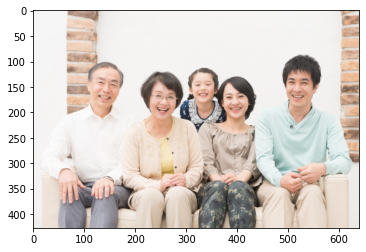

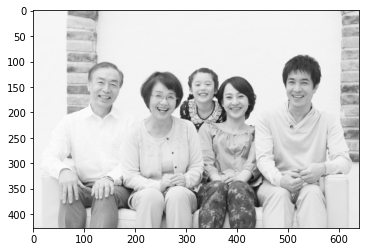

In [ ]:
# カスケードファイルをインターネット（web）から取得
# ダウンロード元のURL文字列
url = "https://raw.githubusercontent.com/masatokg/sample_photo/master/familyface001.PNG"
# 保存ファイル名
savefile = "girl.png"
# 画像をダウンロードして保存
req.urlretrieve(url, savefile)
# 保存した画像をプログラムに読み込む
img = cv2.imread(savefile)
# 表示用のプロットを作成
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# プロットを画面に表示
plt.show()
#物体認識するために、白黒（グレースケール）に変換した画像イメージを作る
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 画像のプロットを使って表示
# plt.imshow(im_gray)
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# カスケードファイルをダウンロード
# ダウンロード元のurl文字列 
url = "https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_alt.xml"
# 保存ファイル名
cascade_file = "cascade_file.xml"
# XMLをダウンロードして保存
req.urlretrieve(url, cascade_file)
# カスケードXMLをプログラムに読み込む（学習モデルのインスタンスを生成）
cascade = cv2.CascadeClassifier(cascade_file)

In [ ]:
# 白黒画像とカスケード物体検出器モデルを使って顔認識を実行する
# 引数のminSizeは画像の中で物体として認識する最小エリアサイズ
face_list = cascade.detectMultiScale(img_gray, minSize=(20, 20))
# 結果を認識
if len(face_list) == 0:
  print("検出数はゼロでした")
else:
  print("検出数:", len(face_list), "件")
# if分終了

検出数: 5 件


In [ ]:
# 検出した数だけループ(face_listは(x,y,w,h)と言うたブルノ配列リスト)
for (x,y,w,h) in face_list:
  print("顔の座標: x=", x, "y=", y, "横幅W=", w, "縦幅H=", h)
  # 短形(rectangle)の色ピクセル情報を定義
  blue=(255,0,0) 
  # img画像（元の画像）に短形を追加　引数は　対象画像、短形の左上座標、右下座標、色情報、線の細さの順
  cv2.rectangle( img, (x,y), (x+w, y+h), blue, thickness=5)
# for分の終了

顔の座標: x= 306 y= 124 横幅W= 54 縦幅H= 54
顔の座標: x= 112 y= 118 横幅W= 66 縦幅H= 66
顔の座標: x= 487 y= 117 横幅W= 66 縦幅H= 66
顔の座標: x= 226 y= 146 横幅W= 61 縦幅H= 61
顔の座標: x= 368 y= 150 横幅W= 56 縦幅H= 56


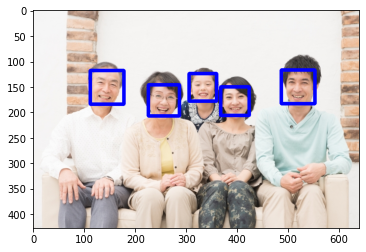

In [ ]:
# 短形が司r他画像データ（img）をファイル保存
cv2.imwrite("face-detect.png", img)
# 表示用のプロットを作成
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# プロットを画面に表示
plt.show()

In [ ]:
# モザイク処理の関数 mosaic
# 引数は　対象画像、エリアを表すタプル（左上のｘ座標y座標、右下のx座標y座標）、縮小時のサイズ
def mosaic( img, rect, size ):
  # モザイクをかける領域を変数に代入
  (x1, y1, x2, y2) = rect
  w = x2 - x1
  h = y2 - y1
  # 画像データを「開始行：終了行,開始列:終了列]で指定して切り抜き
  i_rect = img[ y1:y2, x1:x2 ]
  # 切り抜いた画像を指定サイズに縮小して（ピクセルをつぶす）コピー
  i_small = cv2.resize( i_rect , (size, size) )
  # 縮小した画像データをもとのサイズに拡大する(つぶれたピクセル情報のまま拡大される)
  # interpolation 破格大事にどんなピクセルで保管するかを指定
  i_mos = cv2.resize( i_small, (w, h), interpolation=cv2.INTER_AREA )
  # 出来上がったモザイクデータをもとの画像（のコピー）に重ねる
  img2 = img.copy()
  img2[y1:y2, x1:x2] = i_mos # 行,列で指定した領域にi_mosを上書き
  return img2 # 出来上がったモザイク付きのコピーをリターン
# 関数定義:mosaic 終了

5 件見つかりました


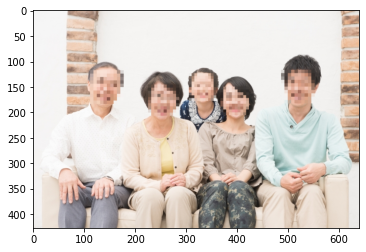

In [ ]:
# ダウンロード元のURL文字列
url = "https://raw.githubusercontent.com/masatokg/sample_photo/master/familyface001.PNG"
# 保存ファイル名
savefile = "girl.png"
# 画像をダウンロードして保存
req.urlretrieve(url, savefile)
# 保存した画像をプログラムに読み込む
img = cv2.imread(savefile)
face_list = cascade.detectMultiScale(img, minSize=(20,20))
# 検出失敗したらメッセージを表示
if len (face_list)==0:print("顔が見つかりません")
else : print(len(face_list), "件見つかりました")
#　検出したエリアに自作関数でモザイクをかける
for(x,y,w,h) in face_list:
  img = mosaic(img, (x,y,x+w, y+h), 10)
# for分終了
# モザイクを付けた画像を表示
cv2.imwrite("family-mosaic.png", img)#画像保存
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()